In [16]:
# 데이터 전처리 (스케일링)
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# 예시 데이터
data = pd.read_csv('csv/weather_data_updated.csv')
x = data.drop("Category", axis=1)


# StandardScaler 적용
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

# 표준화된 데이터 출력
print(scaled_data)


[[ 1.61421221 -0.17176012 -0.89256055 -0.34473069  0.10364535]
 [ 0.58273091 -0.17176012  0.06814819 -0.34473069  1.07678051]
 [ 1.28091341  0.6490118  -1.10100241 -0.34473069 -1.04790733]
 ...
 [ 0.37154961  0.55976267  1.6936781  -0.34473069  1.0943092 ]
 [-0.74247971 -0.17176012  0.46841281 -0.34473069 -0.80253344]
 [ 0.48560321 -0.17176012  1.57717851 -0.34473069  1.08885902]]


In [8]:
# 데이터 전처리 (범주형 데이터)
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 예시 데이터
data = pd.read_csv('csv/weather_data_updated.csv')

df = pd.DataFrame(data)

# OneHotEncoder 적용
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Category']]).toarray()

# 인코딩된 데이터를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Category']))

print(encoded_df)


      Category_국밥  Category_디저트  Category_리멘  Category_분식  Category_스테이크  \
0             0.0           0.0          0.0          1.0            0.0   
1             0.0           1.0          0.0          0.0            0.0   
2             0.0           0.0          0.0          0.0            0.0   
3             0.0           0.0          0.0          0.0            0.0   
4             0.0           0.0          0.0          0.0            0.0   
...           ...           ...          ...          ...            ...   
1995          0.0           0.0          0.0          0.0            0.0   
1996          0.0           0.0          0.0          1.0            0.0   
1997          0.0           0.0          0.0          0.0            1.0   
1998          1.0           0.0          0.0          0.0            0.0   
1999          0.0           0.0          0.0          0.0            1.0   

      Category_족발  Category_중식  Category_찜  Category_초밥  Category_치킨  \
0             0

In [19]:
# RF 피처 중요도 추출
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 예시 데이터
data = pd.read_csv('csv/weather_data_updated.csv')

# 피처(X)와 타겟(y) 분리
X = data.drop("Category", axis=1)
y = data["Category"]

# 랜덤 포레스트 분류기 생성 및 훈련
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X, y)

# 피처 중요도 추출 및 출력
feature_importances = rf_clf.feature_importances_

# 피처 이름 추출
feature_names = X.columns

# 피처 중요도와 함께 데이터프레임 생성
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 중요도에 따라 데이터프레임 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 출력
print(importances_df)



         Feature  Importance
0    Temperature         NaN
1  Precipitation         NaN
2     Cloudiness         NaN
3       Snowfall         NaN
4       Pressure         NaN


In [23]:
# RF 피처 중요도 추출 (결측치 이상치 처리)
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# 예시 데이터
data = pd.read_csv('csv/weather_data_updated.csv')


# 결측치 확인 및 처리
data.isnull().sum()  # 결측치 확인
data.fillna(method='ffill', inplace=True)  # 결측치 처리 (예: 앞의 값으로 채우기)



def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 필터링
    print(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 각 컬럼에 대해 이상치 제거 적용
for column in data.columns[:-1]:  # 마지막 'Category' 컬럼 제외
    data = remove_outliers(data, column)

# 피처(X)와 타겟(y) 분리
X = data.drop("Category", axis=1)
y = data["Category"]

# 랜덤 포레스트 분류기 생성 및 훈련
rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X, y)

# 피처 중요도 추출 및 출력
feature_importances = rf_clf.feature_importances_

# 피처 이름 추출
feature_names = X.columns

# 피처 중요도와 함께 데이터프레임 생성
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# 중요도에 따라 데이터프레임 정렬
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# 출력
print(importances_df)



/var/folders/dg/k946k57108n2bklvf_jw_3y80000gq/T/ipykernel_45215/1246900094.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # 결측치 처리 (예: 앞의 값으로 채우기)


    Temperature  Precipitation  Cloudiness  Snowfall     Pressure Category
66    99.738703      23.670832   88.627605       0.0  1019.466175       카페
      Temperature  Precipitation  Cloudiness  Snowfall     Pressure Category
2       25.835512      94.473411   17.052775       0.0   997.108954        찜
14       8.249654      77.542475   70.035739       0.0  1023.768707       카페
27      11.785108      78.605202   41.720233       0.0  1005.261343       분식
28       6.934320      80.521609    6.016043       0.0   996.946159       국밥
29       5.736580      71.777711   54.102694       0.0  1020.028217      디저트
...           ...            ...         ...       ...          ...      ...
1973    24.386119      91.006563   70.252050       0.0   994.809279        찜
1977     9.965448      91.921906   52.284583       0.0  1007.062385       국밥
1981    15.396296      73.765172   73.774146       0.0  1016.000732      디저트
1992     5.832504      76.967687   21.625693       0.0  1019.446634      파스타
199

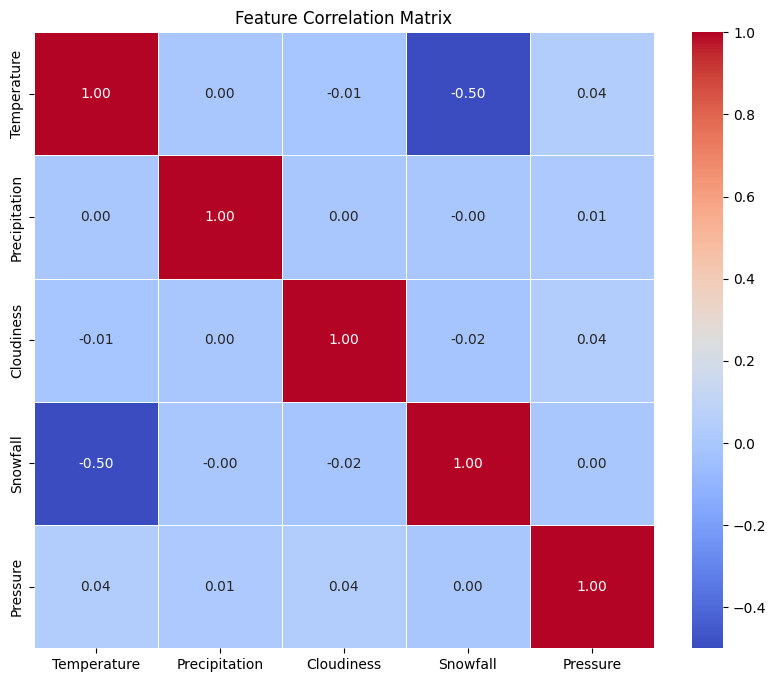

In [27]:
# 데이터 상관관계 보기
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('csv/weather_data_updated.csv')
X = data.drop("Category", axis=1)
# 데이터 상관관계 계산
correlation_matrix = X.corr()

# 상관관계 히트맵 플롯
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Feature Correlation Matrix")
plt.show()

/var/folders/dg/k946k57108n2bklvf_jw_3y80000gq/T/ipykernel_45215/354858622.py:8: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/ryan/Online-Backend-Python/venv/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



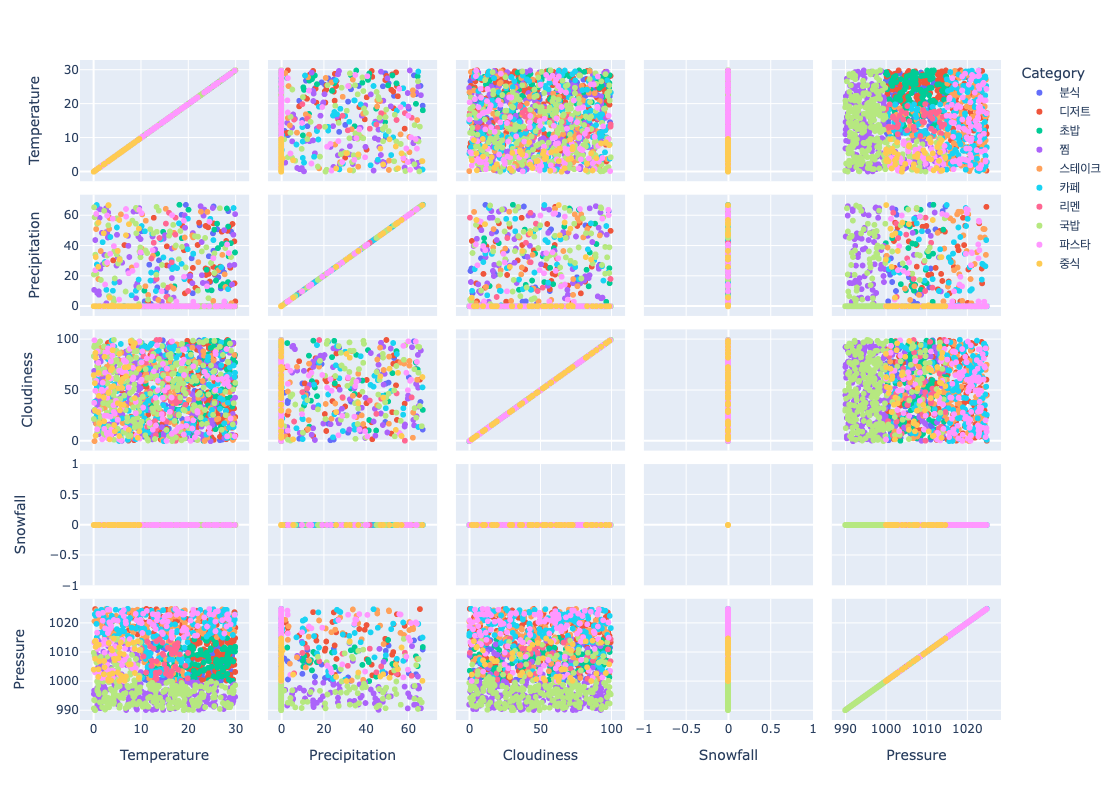

In [30]:
# 데이터 분포도 확인
import plotly.express as px

# 데이터 로드
data = pd.read_csv('csv/weather_data_updated.csv')
# 결측치 확인 및 처리
data.isnull().sum()  # 결측치 확인
data.fillna(method='ffill', inplace=True)  # 결측치 처리 (예: 앞의 값으로 채우기)

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치가 아닌 데이터만 필터링
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 각 컬럼에 대해 이상치 제거 적용
for column in data.columns[:-1]:  # 마지막 'Category' 컬럼 제외
    data = remove_outliers(data, column)
    
fig = px.scatter_matrix(data, 
                        dimensions=["Temperature", "Precipitation", "Cloudiness", "Snowfall", "Pressure"],
                        color="Category", height=800)
fig.show()

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# 데이터 로드 
data = pd.read_csv('csv/weather_data_updated.csv')

# 결측치 처리
data.fillna(method='ffill', inplace=True)

# 이상치 제거 함수
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 이상치 제거
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = remove_outliers(data, column)

# 피처와 타겟 분리
X = data.drop('Category', axis=1)
y = data['Category']

# 데이터 전처리 파이프라인
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Temperature', 'Precipitation', 'Cloudiness', 'Snowfall', 'Pressure']),
    ])

X_processed = preprocessor.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=1)



# 모델 파이프라인
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

new_weather_data = pd.DataFrame([[21, 0, 100, 0, 1010]], 
                                columns=['Temperature', 'Precipitation', 'Cloudiness', 'Snowfall', 'Pressure'])

# 새로운 데이터 스케일링
scaled_new_data = preprocessor.transform(new_weather_data)

# 예측 수행
probs = rf.predict_proba(scaled_new_data)
best_two = np.argsort(probs, axis=1)[:,-2:]
top_categories = [rf.classes_[i] for i in best_two[0][::-1]]
print("Top 2:", top_categories)


k_fold_scores = cross_val_score(rf, X, y, cv=5)

# 교차 검증 결과 출력
print("K-Fold Cross-Validation Scores:", k_fold_scores)
print("Average Score:", k_fold_scores.mean())


/var/folders/dg/k946k57108n2bklvf_jw_3y80000gq/T/ipykernel_45215/1647889393.py:13: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Top 2: ['분식', '초밥']
K-Fold Cross-Validation Scores: [0.32225914 0.33554817 0.31229236 0.35215947 0.3089701 ]
Average Score: 0.32624584717607974
